#                               Trifazni sistemi
Dejan Križaj, 2019

**Namen:** Zvezek (Notebook) je namenjen prikazu uporabe Jupytra za analizo trifaznih sistemov. 

Dandanes imamo distribucijo električne energije v obliki trifaznega sistema. Kar se tiče obravnave (analize), gre preprosto za vezja s tremi enakimi napetostnimi generatorji, katerih signal je fazno zamaknjen za 120 stopinj relativno na ostala dva. Možnih vezav teh treh generatorjev na bremena je več, mi obravnavamo vezavo v trikot in vezavo v zvezdo z in brez ničelnega vodnika. Na koncu pokažemo tudi prednost trifaznega sistema pri priključitvi na simetrično breme.  

**Prej bi lahko predelal tudi:**
https://github.com/osnove/Dodatno/blob/master/Obravnava_vezij_kompleksni_racun.ipynb


<div class="alert alert-block alert-info">
<b>Namig:</b> Obstajata dve verziji tega dokumenta. Ena je v obliki html datoteke (končnica html), ki je ni mogoče izvajati, druga pa ima končnico ipny (Jupyter Notebook), ki jo lahko izvajamo z Jupyter aplikacijo. To aplikacijo imate lahko naloženo na vašem računalniku in se izvaja v brskalniku, lahko jo ogledujete s spletno aplikacijo nbViewer, s spletnimi aplikacijami Binder ali Google Colab  pa jo lahko tudi zaganjate in spreminjate. Več o tem si preberite v 
<a href="http://lbm.fe.uni-lj.si/index.php?option=com_content&view=article&id=59&Itemid=135&lang=si">tem članku</a>.
<br>    
Za izvajanje tega zvezka ne potrebujete posebnega znanja programiranja v Pythonu, lahko pa poljubno spreminjate kodo in se sproti učite tudi uporabe programskega jezika. Več podobnih primerov je na Githubu na https://github.com/osnove/Dodatno/
</div> 
<a href="https://colab.research.google.com/github/osnove/Dodatno/blob/master/Trifazni_sistemi.ipynb">
<img border="0" alt="Filtri" src="https://colab.research.google.com/assets/colab-badge.svg">

## Trifazni sistem

V trifaznem sistemu bomo na sponkah parov tuljav, ki zajemajo šestine oboda statorja, dobili napetosti:

$$\begin{align*}
  & {{u}_{1}}={{U}_{m}}\cos (\omega t+\alpha ),  \\
 & {{u}_{2}}={{U}_{m}}\cos \left( \omega t+\alpha -\frac{2\pi }{3} \right), \\ 
 & {{u}_{3}}={{U}_{m}}\cos \left( \omega t+\alpha +\frac{2\pi }{3} \right). \\ 
\end{align*}$$

Določiti je še potrebno vrednost kota $\alpha$. Mi ga postavimo na $\alpha=\pi/2$.  

S kompleksorji zapišemo sistem treh generatorjev na sledeči način:

$$\begin{align*}
 &{{\underline{U}}_{1}}={{U}_{f}}{{e}^{j\frac{\pi }{2}}}={{U}_{f}}{{e}^{j{{90}^{0}}}}=j{{U}_{f}}, \\ 
 &{{\underline{U}}_{2}}={{U}_{f}}{{e}^{j\left( \frac{\pi }{2}-\frac{2\pi }{3} \right)}}={{U}_{f}}{{e}^{-j\frac{\pi }{6}}}={{U}_{f}}{{e}^{-j{{30}^{0}}}}, \\
& {{\underline{U}}_{3}}={{U}_{f}}{{e}^{j\left( \frac{\pi }{2}+\frac{2\pi }{3} \right)}}={{U}_{f}}{{e}^{-j{{150}^{0}}}}. \end{align*}$$

Kompleksorje napetosti faznih (in medfaznih) napetosti se običajno izraža z efektivnimi vrednostmi. $U_f$ je torej v našem distribucijskem sistemu 230 V, amplituda je torej za $\sqrt 2$ večja.

Jupyter omogoča zelo enostavno računanje s kompleksnimi števili. Za izris kompleksorjev uporabimo izris vektorjev, kot v zvezku https://github.com/osnove/Dodatno/blob/master/Obravnava_vezij_kompleksni_racun.ipynb, ali pa posebej za to izdelano funkcijo complex_plane4. Ta funkcija se nahaja v datoteki funkcije.py na naslovu https://github.com/osnove/other/blob/master/funkcije.py. Če zaganjate ta zvezek iz svojega računalnika, morate imeti to datoteko naloženo v isti mapi iz katere ste zagnali Jupyter in jo uvozite s pomočju ukaza (from funkcije import complex_plane4). Če zaganjate ta zvezek v Colabu je potrebno prenesti ta modul na GDrive, drive povezati z Jupytrom ... Nekaj dela. Najbolj preprosto pa je, da se želeno funkcijo (complex_plane4) iz Githuba preprosto skopira v eno celico in zažene to celico. Potem bo funkcija uporabna v vseh celicah. Če vas zanima uporaba te funkcije, lahko potem, ko je vnešena (import), uporabite ukaz complex_plane4?

(1.40834381902e-14+230j) (199.18584287-115j) (-199.18584287-115j)


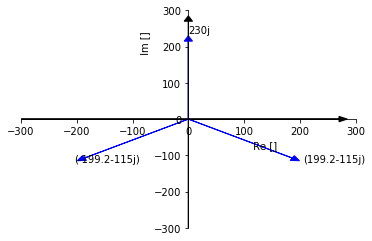

In [21]:
## Izračun in Prikaz trenifaznega sistema generatorjev s kompleksorji v kompleksni ravnini
import matplotlib.pyplot as plt
import numpy as np
from funkcije import complex_plane4

# Za krajši zapis kompleksorjev zapišimo preprosto funkcijo
# a=amplituda, fi= fazni kot v stopinjah
def Ux(a,fi):
    return Uf*np.exp(1j*fi*np.pi/180)

Uf=230
U1=Ux(Uf,90)
U2=Ux(Uf,-30)
U3=Ux(Uf,-150)
print(U1,U2,U3)

complex_plane4([U1,U2,U3],2,1,300)

In [22]:
complex_plane4?

Bremena lahko povežemo tako na fazne kot medfazne napetosti. Slednje lahko določimo iz faznih napetosti, kot je prikazano v spodnji vrstici.

(-199.18584287+345j) (398.371685741+0j) (-199.18584287-345j)


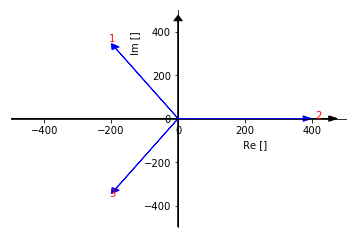

In [24]:
# Izračun in prikaz medfaznih napetosti
U12=U1-U2
U23=U2-U3
U31=U3-U1
print(U12,U23,U31)
complex_plane4([U12,U23,U31],2,2,500) # 1 predstavlja U12 itd

## Primer izračuna moči bremena priključenega na medfazne napetosti

Imamo bremena ${{\underline{Z}}_{12}}=100\ \Omega ,\ {{\underline{Z}}_{23}}=\left( 50+j50 \right)\ \Omega ,\ {{\underline{Z}}_{31}}=-j100\ \Omega $, ki jih priključimo na trifazni sistem 230/400V. Določimo moč na bremenu.

Preprosto. Uporabimo eno od enačb za izračun moči 

$${{\underline{S}}={{\underline{U}}}\underline{I}}^{*}=I^{2}{{\underline{Z}}}=U^{2}\underline{Y}^{*},$$

kjer sta $\underline U$ in $\underline I$ kompleksorja **efektivne** napetosti in toka na posameznem elementu.(zato ni potrebno množenje z 1/2). Običajno je najenostavneje uporabiti enačbo izraženo z efektivno napetostjo na elementu.


In [25]:
Z12=100
Z23=50+1j*50
Z31=-1j*100

Umf=abs(U12)
S12=Umf**2*np.conj(1/Z12)
S23=Umf**2*np.conj(1/Z23)
S31=Umf**2*np.conj(1/Z31)

print(S12,S23,S31)
print(S12+S23+S31)

1587.0 (1587+1587j) -1587j
(3174+0j)


## Primer izračuna moči bremena priključenega na fazne napetosti

### Z ničelnim vodnikom

V tem primeru so bremena priključena direktno na fazne napetosti. Za razliko od prejšnjega primr izračunajmo sedaj tok v fazah in nato napetost.

In [26]:
Z1=100
Z2=50+1j*50
Z3=-1j*100

I1=U1/Z1
I2=U2/Z2
I3=U3/Z3
print('Tokovi so: ',I1,I2,I3)
I0=I1+I2+I3
print('Tok ničelnega vodnika = ',I0)

S1=U1*np.conj(I1)
S2=U2*np.conj(I2)
S3=U3*np.conj(I3)

print('S1,S2,S3 = ',S1,S2,S3)
print('S = ',(S1+S2+S3),'VA')

Tokovi so:  (1.40834381902e-16+2.3j) (0.841858428704-3.1418584287j) (1.15-1.9918584287j)
Tok ničelnega vodnika =  (1.9918584287-2.83371685741j)
S1,S2,S3 =  (529+0j) (529+529j) -529j
S =  (1058+0j) VA


Dobimo 3x manjšo moč kot v prejšnjem primeru, kar je pričakovano, saj je medfazna napetost za $\sqrt3$ večja od fazne. 

Še izris tokov. Uporabimo funkcijo complex_plane4, ki omogoča izpis indeksa. 1 pomeni tok I1, 4 pomeni tok I0. Ker breme ni simetrično (niso vse impedance enake), seveda tudi tokovi ne bodo enaki in ničelni tok bo različen od nič.

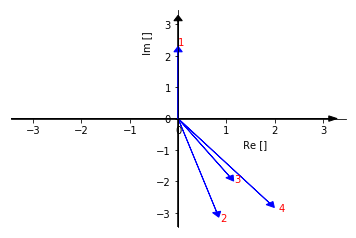

In [27]:
from funkcije import complex_plane4
complex_plane4([I1,I2,I3,I0],2,2)

### Brez ničelnega vodnika

V tem primeru je potrebno izračunati najprej potencial zvezdišča, nato napetosti na bremenih in nato tok, moč, ...

Potencial zvezdišča dobimo s formulo:

$${{\underline{V}}^{*}}=\frac{{{\underline{U}}_{1}}{{\underline{Y}}_{1}}+{{\underline{U}}_{2}}{{\underline{Y}}_{2}}+{{\underline{U}}_{3}}{{\underline{Y}}_{3}}}{{{\underline{Y}}_{1}}+{{\underline{Y}}_{2}}+{{\underline{Y}}_{3}}}, $$ 

Napetost na elementu v fazi 1 je

$${{\underline{U}}_{{{\underline{Z}}_{1}}}}={{\underline{U}}_{1}}-{{\underline{V}}^{*}}$$


(99.5929214352-141.68584287j)


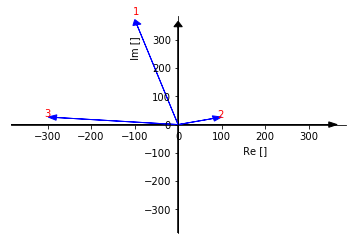

S1,S2,S3 =  (1480.6911579+0j) (106.308842097+106.308842097j) -899.808842097j
(1587-793.5j)


In [28]:
# Vezava v zvezdo brez ničelnega vodnika
# potencial zvezdišča
Vzv=(U1/Z1+U2/Z2+U3/Z3)/(1/Z1+1/Z2+1/Z3)
print(Vzv)

UZ1=U1-Vzv
UZ2=U2-Vzv
UZ3=U3-Vzv
complex_plane4([UZ1,UZ2,UZ3],2,2) # izris napetosti na bremenih

IZ1=UZ1/Z1 # tokovi
IZ2=UZ2/Z2
IZ3=UZ3/Z3

S1=UZ1*np.conj(IZ1) # moči
S2=UZ2*np.conj(IZ2)
S3=UZ3*np.conj(IZ3)
S=S1+S2+S3
print('S1,S2,S3 = ',S1,S2,S3)
print(S)


**Ugotovimo**, da napetost (absolutna vrednost) na elementu v fazi 1 presega napajalno napetost, kar je lahko težava, če element ni dimenzioniran za višjo napetost kot predvideno. Npr. ob izpadu ničelnega vodnika. 

## Zakaj trifazni sistem

Kaj so prednosti trifaznega sistema? Predvsem ga ni težko proizvesti, saj nastane znotraj generatorja z navitji, nameščenimi ločenimi za 120 stopinj. Pri prenosu energije prenašamo tri faze in ničelni vodnik, ki pa je lahko le en in tudi tanjši od faznih saj je ob predpostavki, da so faze obremenjene s simetričnimi bremeni, tok ničelnega vodnika enak nič. Še bolj zanimivo (pomembno) pa je delovanje trifaznih motorjev priključenih na trifazni sistem. V spodnji celici si poglejmo posamezne moči na bremenih in skupno moč.

$$\begin{align}
  & {{p}_{1}}(t)=UI\cos (\omega t)\cdot \cos (\omega t+\beta +\varphi ) \\ 
 & {{p}_{2}}(t)=UI\cos (\omega t-\frac{2\pi }{3})\cdot \cos (\omega t+\beta -\frac{2\pi }{3}) \\ 
 & {{p}_{3}}(t)=UI\cos (\omega t+\frac{2\pi }{3})\cdot \cos (\omega t+\beta +\frac{2\pi }{3}) \\ 
\end{align}$$


V enačbi za $p_1$ smo dodali parameter $\varphi$, ki določa, ali je trifazno breme simetrično ali ne. To je simetrično le za $\varphi=0$, posledice tega pa ugotavljamo v spodnji celicah.


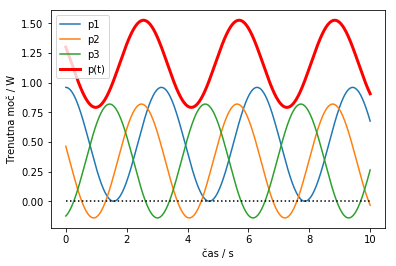

In [29]:
## Izracun moči posameznih faz
Im=0.8
Um=1.2
omega=1
fi=np.pi/4 #np.pi
beta=np.pi/4
t=np.linspace(0,10*omega,1000)

p1=Um*Im*np.cos(omega*t)*np.sin(omega*t+beta+fi)
p2=Um*Im*np.cos(omega*t-2*np.pi/3)*np.sin(omega*t+beta-2*np.pi/3)
p3=Um*Im*np.cos(omega*t+2*np.pi/3)*np.sin(omega*t+beta+2*np.pi/3)
p=p1+p2+p3

plt.figure()
plt.xlabel('čas / s')
plt.ylabel('Trenutna moč / W')
plt.plot(t,p1,label='p1')
plt.plot(t,p2,label='p2')
plt.plot(t,p3,label='p3')
plt.plot(t,p,label='p(t)',linewidth=3,color='r')
plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
plt.legend()

**Ugotovitve:** Zgornja slika prikazuje moči posameznih faz ter skupno moč kot vsoto moči v treh fazah. Iz oblike moči posameznih faz je razvidno, da breme ni simetrično. Predvsem je različna moč v fazi 1 (modra krivulja), ki ni zamaknjena za 120 stopinj relativno na ostali. 

V celici lahko spreminjamo fazni kot fi v prvi fazi in ugotavljamo spremembe. Ko je fi=0 je breme simetrično: bremena v vseh treh fazah so enaka. Lahko pa to opazujemo z aplikacijo v spodnji celici, ki uporabi drsnik za spreminjanje faznega kota v prvi fazi.

In [32]:
## Drsnik za spreminjanje bremena v fazi 1
from ipywidgets import interactive

Im=1
Um=400
omega=1
fi=np.pi/4 #np.pi
beta=np.pi/4
t=np.linspace(0,10*omega,1000)

def power(fi=np.pi/2): # začetna vrednost faze je pi/2
    p1=Um*Im*np.cos(omega*t)*np.sin(omega*t+beta+fi)
    p2=Um*Im*np.cos(omega*t-2*np.pi/3)*np.sin(omega*t+beta-2*np.pi/3)
    p3=Um*Im*np.cos(omega*t+2*np.pi/3)*np.sin(omega*t+beta+2*np.pi/3)
    p=p1+p2+p3

    plt.figure()
    plt.xlabel('čas / s')
    plt.ylabel('Trenutna moč / W')
    plt.plot(t,p1,label='p1')
    plt.plot(t,p2,label='p2')
    plt.plot(t,p3,label='p3')
    plt.plot(t,p,label='p(t)',linewidth=3,color='r')
    plt.plot([0, max(t)],[0, 0], linestyle=':',color='k') # dodamo ničlo
    plt.legend()
    plt.show()
    
interactive_plot = interactive(power,fi=(-np.pi/2, np.pi/2, np.pi/10))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

**Ugotovitve:** Ko je fazni kot fi=0, postane trifazno breme simetrično. Vse tri moči v fazah imajo enako obliko in so zamaknjene za 120 stopinj. Če te tri moči seštejemo, dobimo skupno moč, ki je v tem primeru konstantna. Konstantna v času, kar pomeni, da je tako breme (npr. motor) zelo enakomerno obremenjeno, kar je seveda koristno za delovanje naprave.


## Zaključek

V zvezku smo prikazali možnost uporabe Jupytra za izračune trifaznih sistemov. Pokazali smo tudi prednost trifaznega sistema, če ga uporabimo za vzbujanje trifaznega simetričnega bremena.  


**Naslednje branje:** 